# Plot Zenodo Links Over Time
In this notebook, we will analyze and plot the number of records over time from CSV files in the `download_statistics` folder.

## Import Libraries
Let's start by importing necessary libraries such as `pandas` for data manipulation and `matplotlib` for plotting.

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

## Load Files and Count Records
We will load all CSV files from the `download_statistics` folder, extract their dates from filenames, and count the number of records in each file.

In [2]:
# Get list of CSV files
file_list = glob.glob('../download_statistics/*.csv')

# Prepare a dictionary to store date and record count
record_counts = {}

# Process each file
for file_path in file_list:
    # Extract date from filename
    date_str = file_path.split('/')[-1].split('.')[0]
    # Read the CSV file
    df = pd.read_csv(file_path)
    # Count the number of records
    record_counts[date_str] = len(df)

# Convert to DataFrame
records_df = pd.DataFrame(list(record_counts.items()), columns=['Date', 'RecordCount'])
records_df['Date'] = pd.to_datetime(records_df['Date'], format='%Y%m%d')
records_df.sort_values('Date', inplace=True)

## Plot the Data
Let's plot the number of records over time using `matplotlib`.

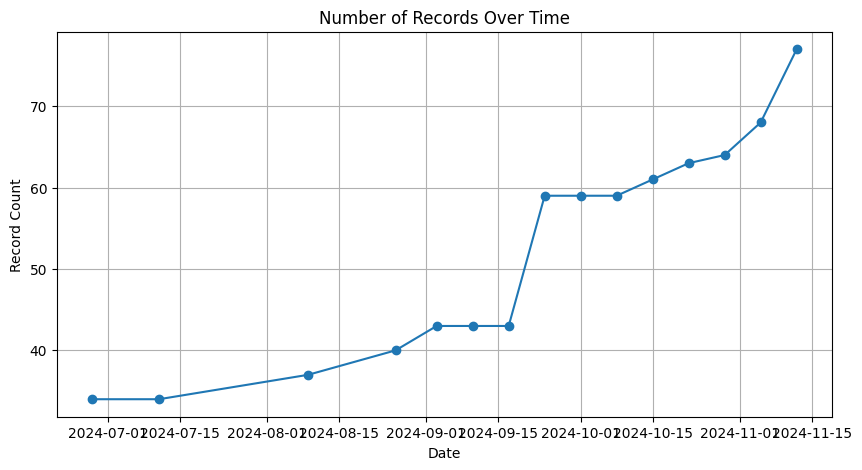

In [3]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(records_df['Date'], records_df['RecordCount'], marker='o')
plt.title('Number of Records Over Time')
plt.xlabel('Date')
plt.ylabel('Record Count')
plt.grid(True)
# Save the plot
plt.savefig('zenodo_links_over_time.png')
plt.show()